# Business Growth Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import datetime

## Import Data Source

In [103]:
data_src = "Raw-Agg Perf Nationwide_Wk 2023021.csv"
cols = ['TM_KEY_DAY', 'TM_KEY_WK', 'TM_KEY_MTH', 'TM_KEY_YR', 'CENTER', 'METRIC_GRP', 'COMP_CD', 'PRODUCT_GRP', 'METRIC_CD', 'METRIC_NAME', 'ACTUAL_AS_OF', 'AGG_TYPE', 'RR_IND', 'GRY_IND', 'UOM', 'PERIOD', 'ACTUAL_SNAP', 'ACTUAL_AGG', 'TARGET_SNAP', 'TARGET_AGG', 'PPN_TM']
df = pd.read_csv(data_src, low_memory=False)
# df = df.loc[:, cols]
df = df[cols]

curr_yr = max(df['TM_KEY_YR'])
curr_mth = max(df['TM_KEY_MTH'])
curr_wk = max(df['TM_KEY_WK'])
curr_day = max(df['TM_KEY_DAY'])
last_ppn_tm = max(df['PPN_TM'])

df.head(3)

,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,TM_KEY_YR,CENTER,METRIC_GRP,COMP_CD,PRODUCT_GRP,METRIC_CD,METRIC_NAME,...,AGG_TYPE,RR_IND,GRY_IND,UOM,PERIOD,ACTUAL_SNAP,ACTUAL_AGG,TARGET_SNAP,TARGET_AGG,PPN_TM
0,20230301,2023009,202303,2023,Digitalization,Digitalization,TRUE,All Services,DIS10015,% After-Sales Service via Digital Channels,...,N,0,GYR,%,M,NaN,NaN,NaN,NaN,2023-05-29 17:45:40
1,20230302,2023009,202303,2023,Digitalization,Digitalization,TRUE,All Services,DIS10015,% After-Sales Service via Digital Channels,...,N,0,GYR,%,M,NaN,NaN,NaN,NaN,2023-05-29 17:45:40
2,20230303,2023009,202303,2023,Digitalization,Digitalization,TRUE,All Services,DIS10015,% After-Sales Service via Digital Channels,...,N,0,GYR,%,M,NaN,NaN,NaN,NaN,2023-05-29 17:45:40


In [104]:
df.shape

(45568, 21)

## Week period

In [105]:
first_wk_day = df.groupby('TM_KEY_WK').agg({'TM_KEY_DAY': 'min'}).reset_index()
last_wk_day = df.groupby('TM_KEY_WK').agg({'TM_KEY_DAY': 'max'}).reset_index()
wk_day_period = pd.merge(first_wk_day, last_wk_day, on='TM_KEY_WK')
wk_day_period.tail()

,TM_KEY_WK,TM_KEY_DAY_x,TM_KEY_DAY_y
8,2023017,20230424,20230430
9,2023018,20230501,20230507
10,2023019,20230508,20230514
11,2023020,20230515,20230521
12,2023021,20230522,20230528


## Preview Data

In [72]:
df_tmp = df[df['CENTER'] == 'Sales & Revenue']
df_tmp.head(3)

# df_tmp.to_excel("temp.xlsx")

,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,CENTER,METRIC_GRP,COMP_CD,PRODUCT_GRP,METRIC_CD,METRIC_NAME,ACTUAL_AS_OF,AGG_TYPE,RR_IND,GRY_IND,UOM,PERIOD,ACTUAL_SNAP,ACTUAL_AGG,TARGET_SNAP,TARGET_AGG,PPN_TM
2492,20230301,2023009,202303,Sales & Revenue,NaN,TRUE,TVS,TB4R000901,Ads/sponsership,NaN,A,0,GYR,baht,M,NaN,NaN,NaN,NaN,2023-05-29 17:45:40
2493,20230302,2023009,202303,Sales & Revenue,NaN,TRUE,TVS,TB4R000901,Ads/sponsership,NaN,A,0,GYR,baht,M,NaN,NaN,NaN,NaN,2023-05-29 17:45:40
2494,20230303,2023009,202303,Sales & Revenue,NaN,TRUE,TVS,TB4R000901,Ads/sponsership,NaN,A,0,GYR,baht,M,NaN,NaN,NaN,NaN,2023-05-29 17:45:40


In [73]:
df_tmp['AGG_TYPE'].unique()
df_tmp.groupby('AGG_TYPE').size()
# df_tmp.shape

AGG_TYPE
A     1424
N     5340
S    25276
dtype: int64

In [74]:
df_agg_n = df_tmp[df_tmp['AGG_TYPE']=='N'].sort_values('TM_KEY_DAY')
df_agg_n.head(3)
# df_agg_n['METRIC_NAME'].unique()

,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,CENTER,METRIC_GRP,COMP_CD,PRODUCT_GRP,METRIC_CD,METRIC_NAME,ACTUAL_AS_OF,AGG_TYPE,RR_IND,GRY_IND,UOM,PERIOD,ACTUAL_SNAP,ACTUAL_AGG,TARGET_SNAP,TARGET_AGG,PPN_TM
4361,20230301,2023009,202303,Sales & Revenue,Subs,DTAC,Postpaid,DB2S020201,Churn (Exclude M2M) : DTAC,NaN,N,0,RYG,subs,M,NaN,NaN,NaN,NaN,2023-05-29 17:45:40
14774,20230301,2023009,202303,Sales & Revenue,Subs,ALL,Postpaid,B2S020401,Postpaid Active Subs <90 days B2B,NaN,N,0,GYR,subs,M,NaN,0.0,NaN,NaN,2023-05-29 17:45:40
31773,20230301,2023009,202303,Sales & Revenue,Subs,TRUE,Prepaid,TB1S000601,Prepaid Revenue Subs : Thai Mass : TMH,NaN,N,0,GYR,subs,M,NaN,NaN,NaN,NaN,2023-05-29 17:45:40


In [75]:
df_agg_s = df_tmp[df_tmp['AGG_TYPE']=='S'].sort_values('TM_KEY_DAY')
df_agg_s.head(3)
# df_agg_s['METRIC_NAME'].unique()

,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,CENTER,METRIC_GRP,COMP_CD,PRODUCT_GRP,METRIC_CD,METRIC_NAME,ACTUAL_AS_OF,AGG_TYPE,RR_IND,GRY_IND,UOM,PERIOD,ACTUAL_SNAP,ACTUAL_AGG,TARGET_SNAP,TARGET_AGG,PPN_TM
3471,20230301,2023009,202303,Sales & Revenue,Revenue,ALL,Prepaid,B1R000702,CRR : Average MTD Daily Revenue,NaN,S,1,GYR,baht,M,NaN,0.0,NaN,NaN,2023-05-29 17:45:40
11570,20230301,2023009,202303,Sales & Revenue,Subs,ALL,Postpaid,B2R010500,Paid Amount B2C,NaN,S,0,GYR,subs,M,NaN,0.0,NaN,NaN,2023-05-29 17:45:40
35778,20230301,2023009,202303,Sales & Revenue,Revenue,ALL,Prepaid,B1R000703,RRR : Required Runrate on Average Remainning D...,NaN,S,1,GYR,baht,M,NaN,0.0,NaN,NaN,2023-05-29 17:45:40


In [ ]:
df_tmp_agg = df_tmp.groupby(['METRIC_CD', 'METRIC_NAME']).agg({'ACTUAL_AS_OF': 'max', 'ACTUAL_SNAP': 'sum', 'PPN_TM': 'max'}).reset_index()
df_tmp_agg.head()
# df_tmp_agg.tail()

In [ ]:
# df_tmp_agg = df_tmp[df_tmp['METRIC_NAME'] == 'Postpaid Activation Subs B2B : TMH']
df_tmp_agg = df_tmp[df_tmp['TM_KEY_MTH'] == 202305].loc[:, ['TM_KEY_DAY', 'TM_KEY_WK', 'TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME', 'ACTUAL_AS_OF', 'ACTUAL_SNAP', 'ACTUAL_AGG', 'PPN_TM']]
df_tmp_agg.tail()
# df_tmp_agg

In [ ]:
# df_tmp['ACTUAL_SNAP'].notnull()
# df_tmp.notnull()
df_tmp['DAY_ACT_SNAP'] = np.where(df_tmp['ACTUAL_SNAP'].notnull(), df_tmp['TM_KEY_DAY'], 0)
df_tmp['x'] = np.where(df_tmp['ACTUAL_SNAP'].notnull(), 1, 0)
df_tmp['x2'] = df_tmp['ACTUAL_SNAP'].apply(lambda x: 1 if x >= 0 else 0)
# df_tmp['x3'] = df_tmp.apply(lambda x: 1 if x['ACTUAL_SNAP'].notnull() else 0, axis=1)

# df['Final_fee'] = df.apply(lambda x: x['Fee'] - x['Discount'], axis=1)
# df[new_columns_name] = df[column_A].apply(lambda x: 1 if x >= 0 else 0)
df_tmp.tail()

## BG Revenue Data

In [123]:
# bg_cd_list = ['B1R000100', 'B2R000100', 'TB3R000100', 'TB4R000100', 'TNSC00142'] # include "TDG Revenue (Performance View)"
bg_rev_cd_list = ['B1R000100', 'B2R000100', 'TB3R000100', 'TB4R000100']
df_rev = df[df['METRIC_CD'].isin(bg_rev_cd_list)]
df_rev.head(3)

,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,TM_KEY_YR,CENTER,METRIC_GRP,COMP_CD,PRODUCT_GRP,METRIC_CD,METRIC_NAME,...,AGG_TYPE,RR_IND,GRY_IND,UOM,PERIOD,ACTUAL_SNAP,ACTUAL_AGG,TARGET_SNAP,TARGET_AGG,PPN_TM
20292,20230301,2023009,202303,2023,Sales & Revenue,Revenue,ALL,Postpaid,B2R000100,Postpaid Revenue,...,S,0,GYR,baht,M,1.376380e+07,1.376380e+07,6.416632e+06,6.416632e+06,2023-05-29 17:45:40
20293,20230302,2023009,202303,2023,Sales & Revenue,Revenue,ALL,Postpaid,B2R000100,Postpaid Revenue,...,S,0,GYR,baht,M,8.521882e+08,8.659520e+08,8.645637e+08,8.709803e+08,2023-05-29 17:45:40
20294,20230303,2023009,202303,2023,Sales & Revenue,Revenue,ALL,Postpaid,B2R000100,Postpaid Revenue,...,S,0,GYR,baht,M,9.943611e+07,9.653881e+08,9.872504e+07,9.697053e+08,2023-05-29 17:45:40


In [111]:
df_rev.shape

(356, 21)

## Visualization
##### https://matplotlib.org/stable/tutorials/introductory/pyplot.html

In [125]:
# BG Revenue Rawdata
# df_rev_agg = pd.DataFrame(df_rev.groupby(['TM_KEY_DAY', 'TM_KEY_WK', 'TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME']).agg({'ACTUAL_SNAP': 'sum', 'TARGET_SNAP': 'sum'}).reset_index())
df_rev_agg = df_rev.loc[:, ['TM_KEY_DAY', 'TM_KEY_WK', 'TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME', 'ACTUAL_SNAP', 'ACTUAL_AGG', 'TARGET_SNAP', 'TARGET_AGG']]
df_rev_agg['ACTUAL_SNAP'] = df_rev_agg['ACTUAL_SNAP'] / 1000000
df_rev_agg['TARGET_SNAP'] = df_rev_agg['TARGET_SNAP'] / 1000000

# df_rev_agg.to_excel('temp.xlsx')
df_rev_agg.head()

,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,METRIC_CD,METRIC_NAME,ACTUAL_SNAP,ACTUAL_AGG,TARGET_SNAP,TARGET_AGG
20292,20230301,2023009,202303,B2R000100,Postpaid Revenue,13.763796,1.376380e+07,6.416632,6.416632e+06
20293,20230302,2023009,202303,B2R000100,Postpaid Revenue,852.188211,8.659520e+08,864.563665,8.709803e+08
20294,20230303,2023009,202303,B2R000100,Postpaid Revenue,99.436112,9.653881e+08,98.725042,9.697053e+08
20295,20230304,2023009,202303,B2R000100,Postpaid Revenue,97.931518,1.063320e+09,99.376343,1.069082e+09
20296,20230305,2023009,202303,B2R000100,Postpaid Revenue,93.906474,1.157226e+09,96.530169,1.165612e+09


In [126]:
df_rev_agg.shape

(356, 9)

## Monthly Performance

In [173]:
# Rawdata by month
df_rev_mth = df_rev_agg.groupby('TM_KEY_MTH').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()
df_rev_mth['%ACHIEVE'] = (df_rev_mth['ACTUAL_SNAP'] / df_rev_mth['TARGET_SNAP']) * 100
df_rev_mth['ACTUAL_DIFF'] = df_rev_mth['ACTUAL_SNAP'].diff()
df_rev_mth['LAST_MTH_ACTUAL'] = df_rev_mth['ACTUAL_SNAP'] - df_rev_mth['ACTUAL_DIFF']

# Aggregation
x = df_rev_mth['TM_KEY_MTH'].apply(str).str[4:]
x_axis = np.arange(len(x))
y_act = df_rev_mth['ACTUAL_SNAP'].round(2)
y_tgt = df_rev_mth['TARGET_SNAP'].round(2)
y_ach = df_rev_mth['%ACHIEVE'].round(2)
y_diff = df_rev_mth['ACTUAL_DIFF'].round(2)
y_last_act = df_rev_mth['LAST_MTH_ACTUAL'].round(2)

# df_rev_mth

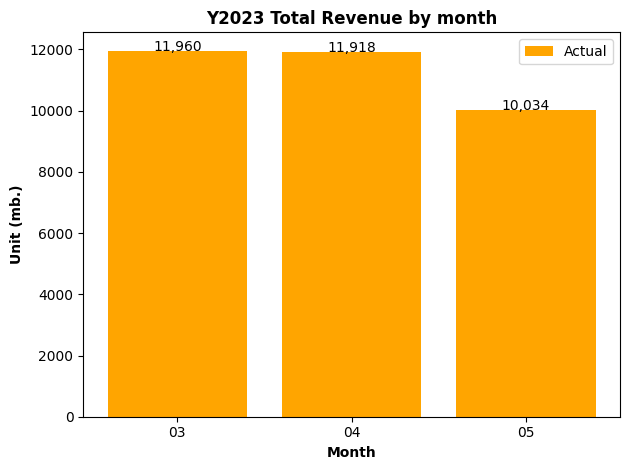

In [174]:
# plt.figure().set_figwidth(12)

plt.bar(x_axis, y_act, label='Actual', color='orange')
for i in x_axis:    
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i], y_act[i]), ha='center')
    
plt.xticks(x_axis, x)
plt.xlabel('Month', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Total Revenue by month', fontdict={'fontweight': 'bold'})
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# plt.figure().set_figwidth(12)

plt.plot(x_axis, y_tgt, 'bo--', markeredgewidth=3, label='Target')
plt.plot(x_axis, y_act, marker='.', markeredgewidth=3, label='Actual', color='red')
for i in x_axis:
    plt.annotate(str(format(y_tgt[i],',.0f')), xy=(x_axis[i], y_tgt[i]))
    # plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i], y_act[i]))

plt.xticks(x_axis, x)
plt.xlabel('Month', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Total Revenue : Monthly trend', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# plt.figure().set_figwidth(12)

plt.subplot(211)
plt.plot(x_axis, y_ach, marker='.', markeredgewidth=3, label='% Achieve', color='y')
for i in x_axis:
    plt.annotate(str(format(y_ach[i]/100,',.2%')), xy=(x_axis[i], y_ach[i]))
plt.xticks(x_axis, x)
plt.title(f'Y{curr_yr} Total Revenue %Achieve & Different by month', fontdict={'fontweight': 'bold'})
plt.ylabel('% Achieve', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(x_axis, y_diff, marker='.', markeredgewidth=3, label='Diff by month', color='m')
for i in x_axis:
    plt.annotate(str(format(y_diff[i],',.0f')), xy=(x_axis[i], y_diff[i]))
plt.xticks(x_axis, x)
plt.xlabel('Month', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Weekly Performance

In [170]:
# Rawdata by week
df_rev_wk = df_rev_agg.groupby('TM_KEY_WK').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()
df_rev_wk['%ACHIEVE'] = (df_rev_wk['ACTUAL_SNAP'] / df_rev_wk['TARGET_SNAP']) * 100
df_rev_wk['ACTUAL_DIFF'] = df_rev_wk['ACTUAL_SNAP'].diff().fillna(0)
df_rev_wk['LAST_WK_ACTUAL'] = df_rev_wk['ACTUAL_SNAP'] - df_rev_wk['ACTUAL_DIFF']
# df_rev_wk['FF_NULL_TEST'] = df_rev_wk['ACTUAL_DIFF'].fillna(0)

# Aggregation
x = df_rev_wk['TM_KEY_WK'].apply(str).str[5:]
x_axis = np.arange(len(x))
y_act = df_rev_wk['ACTUAL_SNAP'].round(2)
y_tgt = df_rev_wk['TARGET_SNAP'].round(2)
y_ach = df_rev_wk['%ACHIEVE'].round(2)
y_diff = df_rev_wk['ACTUAL_DIFF'].round(2)
y_last_act = df_rev_wk['LAST_WK_ACTUAL'].round(2)

# df_rev_wk.tail()

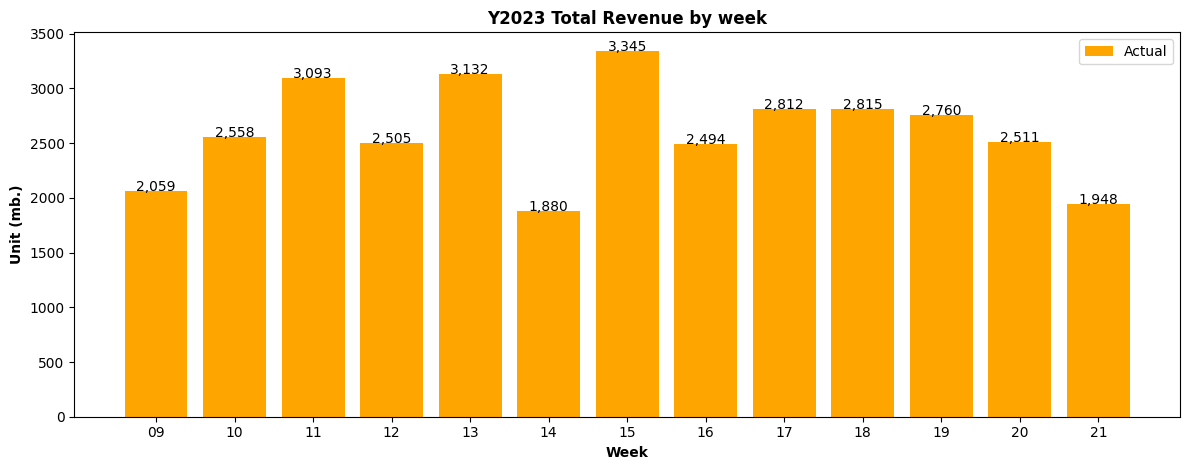

In [149]:
plt.figure().set_figwidth(12)

plt.bar(x_axis, y_act, label='Actual', color='orange')
for i in x_axis:    
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i], y_act[i]), ha='center')
    
plt.xticks(x_axis, x)
plt.xlabel('Week', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Total Revenue by week', fontdict={'fontweight': 'bold'})
plt.legend()

plt.tight_layout()
plt.show()

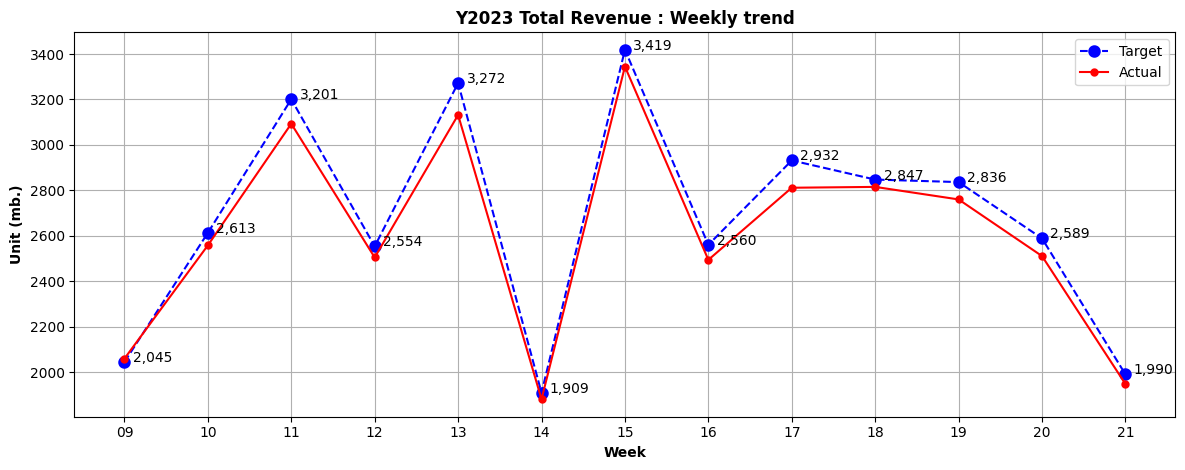

In [171]:
plt.figure().set_figwidth(12)

plt.plot(x_axis, y_tgt, 'bo--', markeredgewidth=3, label='Target')
plt.plot(x_axis, y_act, marker='.', markeredgewidth=3, label='Actual', color='red')
for i in x_axis:
    plt.annotate(str(format(y_tgt[i],',.0f')), xy=(x_axis[i]+0.1, y_tgt[i]))
    # plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i]+0.1, y_act[i]))

plt.xticks(x_axis, x)
plt.xlabel('Week', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Total Revenue : Weekly trend', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

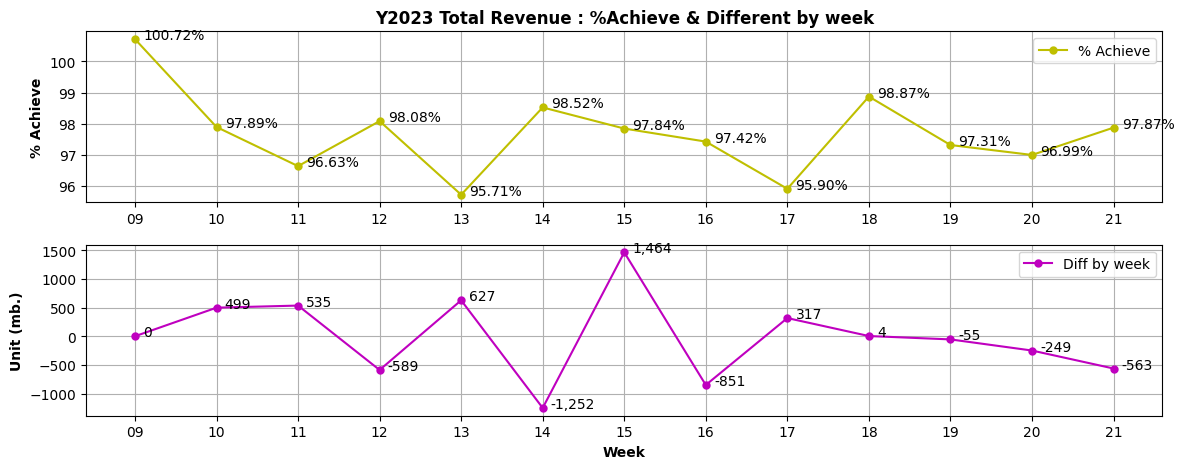

In [167]:
plt.figure().set_figwidth(12)

plt.subplot(211)
plt.plot(x_axis, y_ach, marker='.', markeredgewidth=3, label='% Achieve', color='y')
for i in x_axis:
    plt.annotate(str(format(y_ach[i]/100,',.2%')), xy=(x_axis[i]+0.1, y_ach[i]))
plt.xticks(x_axis, x)
plt.title(f'Y{curr_yr} Total Revenue : %Achieve & Different by week', fontdict={'fontweight': 'bold'})
plt.ylabel('% Achieve', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(x_axis, y_diff, marker='.', markeredgewidth=3, label='Diff by week', color='m')
for i in x_axis:
    plt.annotate(str(format(y_diff[i],',.0f')), xy=(x_axis[i]+0.1, y_diff[i]))
plt.xticks(x_axis, x)
plt.xlabel('Week', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Daily Performance

In [179]:
# Rawdata by day
df_rev_day = df_rev_agg[df_rev_agg['TM_KEY_MTH']==curr_mth].groupby('TM_KEY_DAY').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()
# df_rev_day = df_rev_agg.groupby('TM_KEY_DAY').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()
df_rev_day['%ACHIEVE'] = (df_rev_day['ACTUAL_SNAP'] / df_rev_day['TARGET_SNAP']) * 100
df_rev_day['ACTUAL_DIFF'] = df_rev_day['ACTUAL_SNAP'].diff().fillna(0)
df_rev_day['LAST_DAY_ACTUAL'] = df_rev_day['ACTUAL_SNAP'] - df_rev_day['ACTUAL_DIFF']
# df_rev_day['FF_NULL_TEST'] = df_rev_day['ACTUAL_DIFF'].fillna(0)

# Aggregation
x = df_rev_day['TM_KEY_DAY'].apply(str).str[6:]
x_axis = np.arange(len(x))
y_act = df_rev_day['ACTUAL_SNAP'].round(2)
y_tgt = df_rev_day['TARGET_SNAP'].round(2)
y_ach = df_rev_day['%ACHIEVE'].round(2)
y_diff = df_rev_day['ACTUAL_DIFF'].round(2)
y_last_act = df_rev_day['LAST_DAY_ACTUAL'].round(2)

df_rev_day.tail()

,TM_KEY_DAY,ACTUAL_SNAP,TARGET_SNAP,%ACHIEVE,ACTUAL_DIFF,LAST_DAY_ACTUAL
23,20230524,200.652999,203.985553,98.366280,2.666892,197.986107
24,20230525,707.337430,732.794275,96.526058,506.684431,200.652999
25,20230526,120.593038,117.706732,102.452117,-586.744391,707.337430
26,20230527,0.000000,0.000000,NaN,-120.593038,120.593038
27,20230528,0.000000,0.000000,NaN,0.000000,0.000000


In [143]:
df_rev_day.shape

(28, 6)

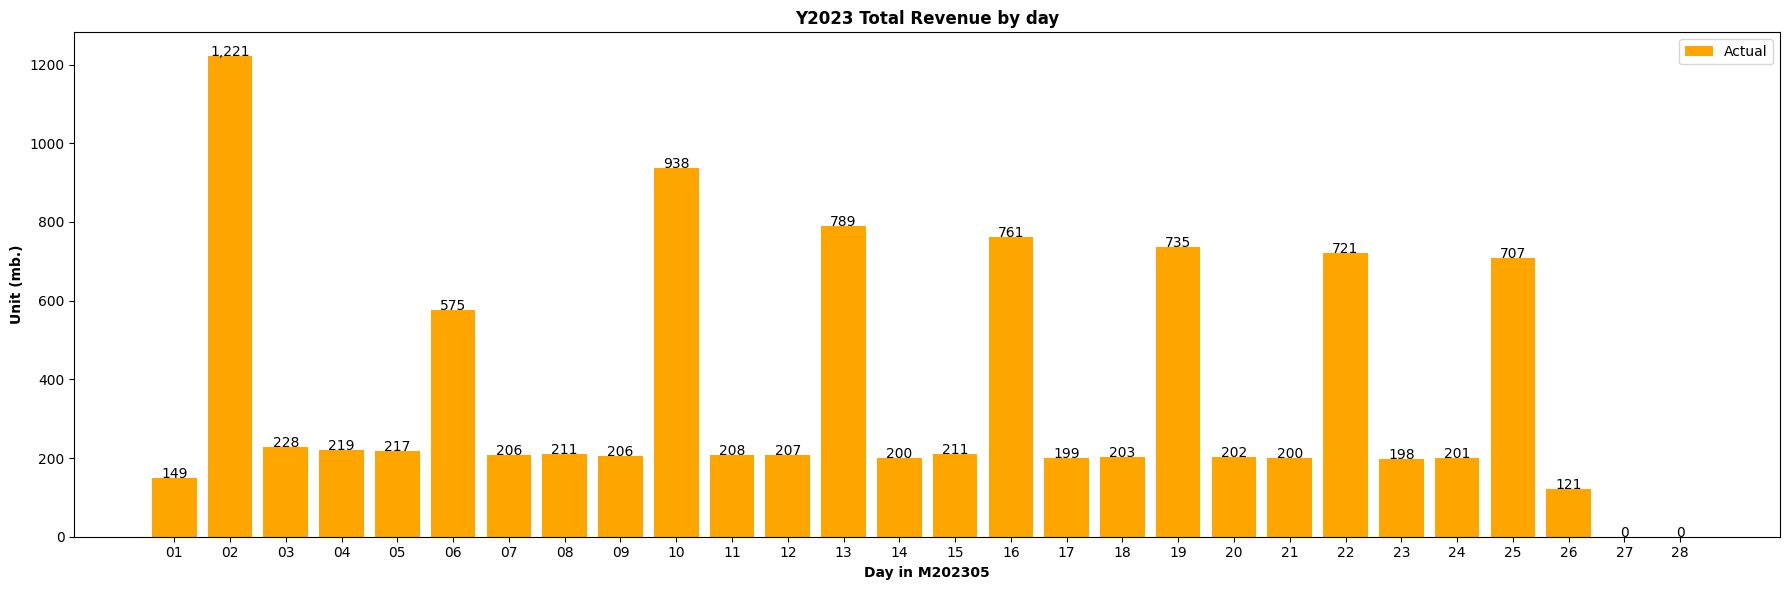

In [180]:
# plt.figure().set_figwidth(12)
plt.figure(figsize=(18,6))

plt.bar(x_axis, y_act, label='Actual', color='orange')
for i in x_axis:    
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i], y_act[i]), ha='center')
    
plt.xticks(x_axis, x)
plt.xlabel(f'Day in M{curr_mth}', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Total Revenue by day', fontdict={'fontweight': 'bold'})
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# plt.figure().set_figwidth(12)
plt.figure(figsize=(18,6))

plt.plot(x_axis, y_tgt, 'bo--', markeredgewidth=3, label='Target')
plt.plot(x_axis, y_act, marker='.', markeredgewidth=3, label='Actual', color='red')
for i in x_axis:
    plt.annotate(str(format(y_tgt[i],',.0f')), xy=(x_axis[i]+0.1, y_tgt[i]))
    # plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i]+0.1, y_act[i]))

plt.xticks(x_axis, x)
plt.xlabel(f'Day in M{curr_mth}', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Total Revenue : Daily trend', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# plt.figure().set_figwidth(12)
plt.figure(figsize=(18,6))

plt.subplot(211)
plt.plot(x_axis, y_ach, marker='.', markeredgewidth=3, label='% Achieve', color='y')
for i in x_axis:
    plt.annotate(str(format(y_ach[i]/100,',.2%')), xy=(x_axis[i]+0.1, y_ach[i]))
plt.xticks(x_axis, x)
plt.title(f'Y{curr_yr} Total Revenue : %Achieve & Different by day', fontdict={'fontweight': 'bold'})
plt.ylabel('% Achieve', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(x_axis, y_diff, marker='.', markeredgewidth=3, label='Diff by day', color='m')
for i in x_axis:
    plt.annotate(str(format(y_diff[i],',.0f')), xy=(x_axis[i]+0.1, y_diff[i]))
plt.xticks(x_axis, x)
plt.xlabel(f'Day in M{curr_mth}', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Daily Performance M2D ???

In [169]:
# Rawdata by day
df_rev_day = df_rev_agg[df_rev_agg['TM_KEY_MTH']==curr_mth].groupby('TM_KEY_DAY').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()
# df_rev_day = df_rev_agg.groupby('TM_KEY_DAY').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()
df_rev_day['%ACHIEVE'] = (df_rev_day['ACTUAL_SNAP'] / df_rev_day['TARGET_SNAP']) * 100
df_rev_day['ACTUAL_DIFF'] = df_rev_day['ACTUAL_SNAP'].diff().fillna(0)
df_rev_day['LAST_DAY_ACTUAL'] = df_rev_day['ACTUAL_SNAP'] - df_rev_day['ACTUAL_DIFF']
# df_rev_day['FF_NULL_TEST'] = df_rev_day['ACTUAL_DIFF'].fillna(0)

# Aggregation
x = df_rev_day['TM_KEY_DAY'].apply(str).str[6:]
x_axis = np.arange(len(x))
y_act = df_rev_day['ACTUAL_SNAP'].round(2)
y_tgt = df_rev_day['TARGET_SNAP'].round(2)
y_ach = df_rev_day['%ACHIEVE'].round(2)
y_diff = df_rev_day['ACTUAL_DIFF'].round(2)
y_last_act = df_rev_day['LAST_DAY_ACTUAL'].round(2)

df_rev_day.tail()

,TM_KEY_DAY,ACTUAL_SNAP,TARGET_SNAP,%ACHIEVE,ACTUAL_DIFF,LAST_DAY_ACTUAL
23,20230524,200.652999,203.985553,98.366280,2.666892,197.986107
24,20230525,707.337430,732.794275,96.526058,506.684431,200.652999
25,20230526,120.593038,117.706732,102.452117,-586.744391,707.337430
26,20230527,0.000000,0.000000,NaN,-120.593038,120.593038
27,20230528,0.000000,0.000000,NaN,0.000000,0.000000
